# Importing The Dependancies:
---

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

# Loading The Data Into A DataFrame:
---

Here we have two datasests, one for training a machine learning model, and the other for evaluationg the model. We will be using the train one for now, and we will use the testing dataset at the end. <a href="https://www.kaggle.com/competitions/titanic/data">Click this to understand the data.</a>


In [2]:
df_train = pd.read_csv('../Datasets/Titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('../Datasets/Titanic/test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploartory Data Analysis:
---

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checking for missing data:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# dealing with the missing data:
ids=df_test.PassengerId
def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.dropna(inplace=True)
    return data

In [8]:
df_train = clean(df_train)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df_test = clean(df_test)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [10]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [12]:
df_train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

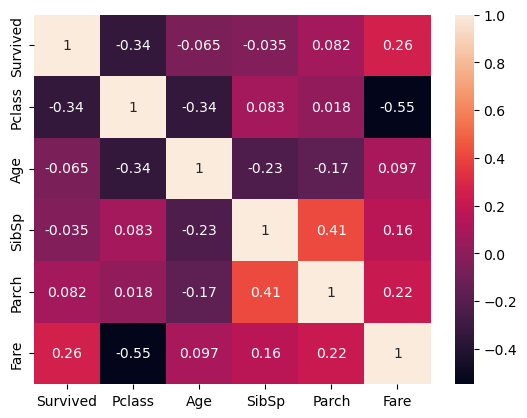

In [13]:
sns.heatmap(df_train.corr(), annot=True)

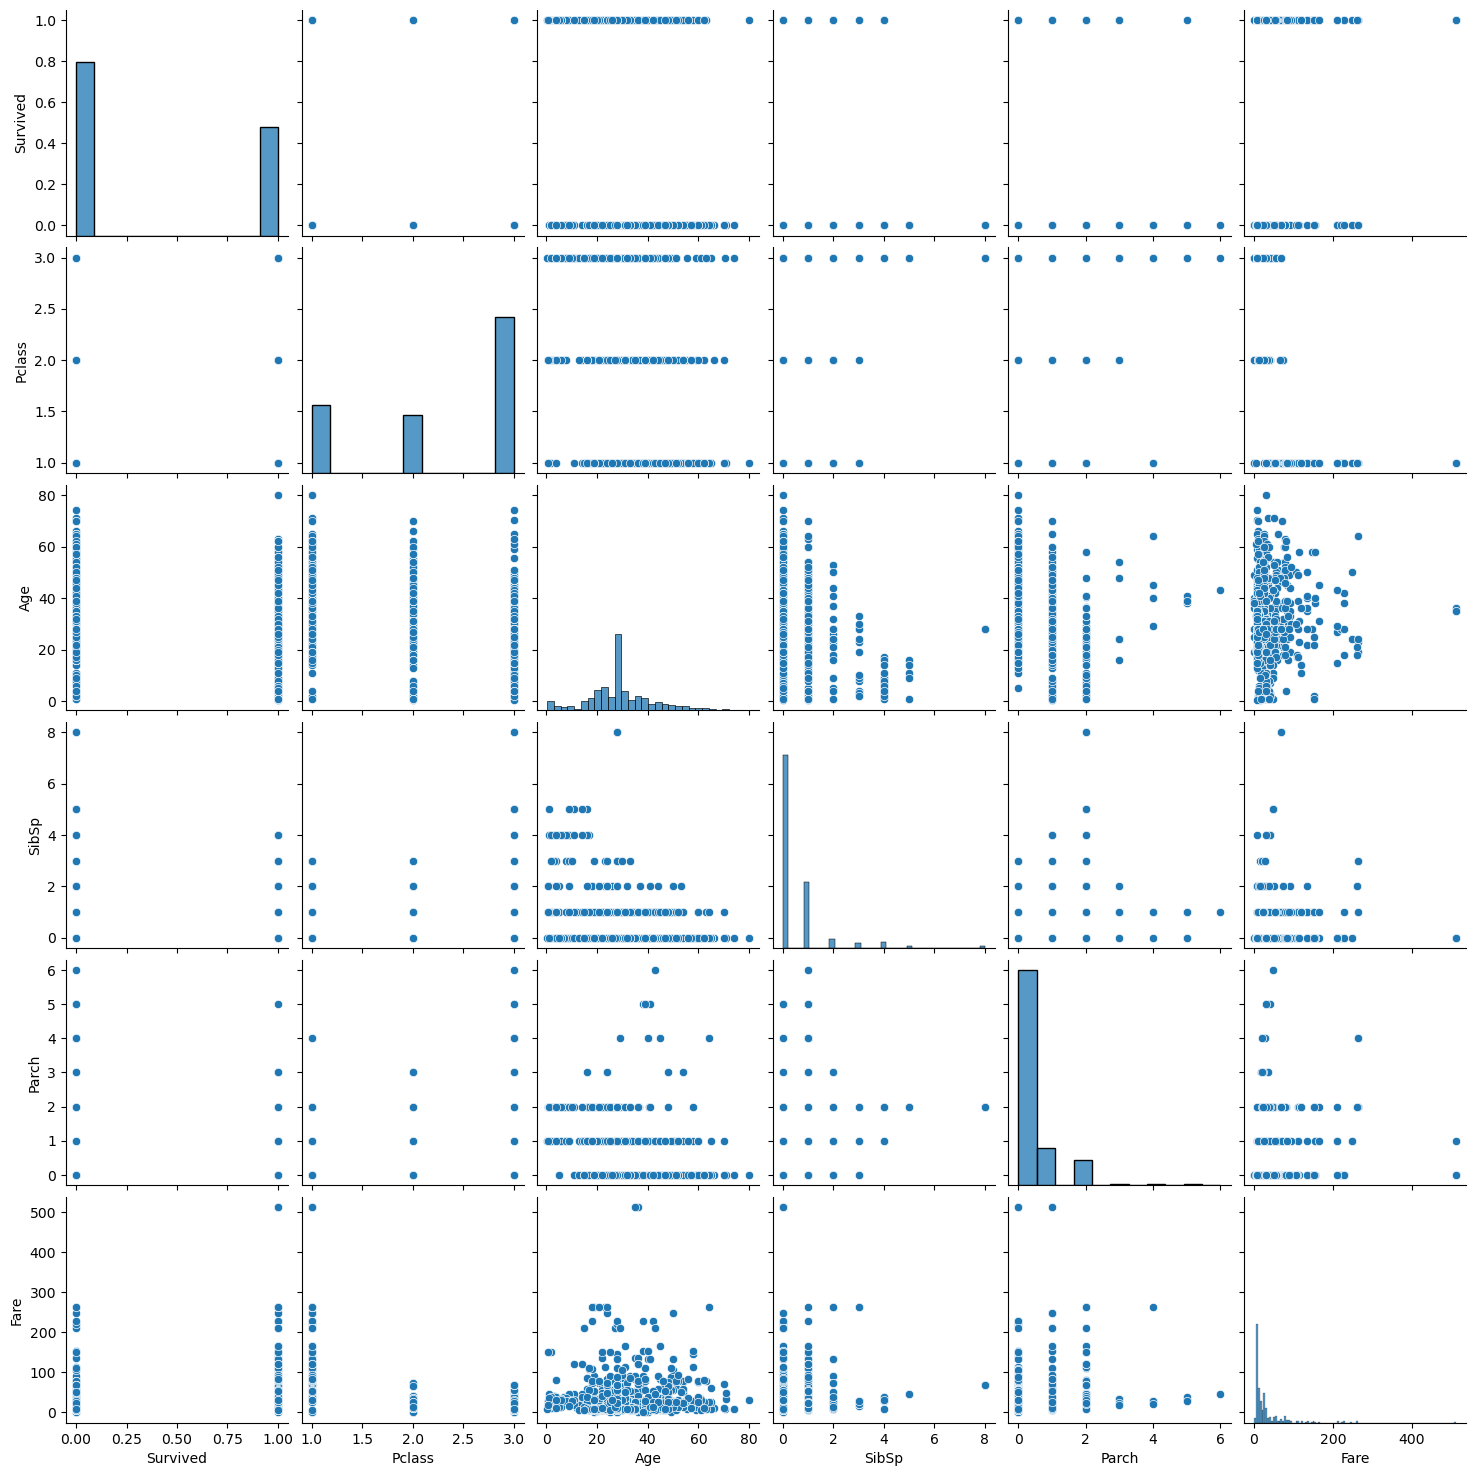

In [14]:
sns.pairplot(df_train)

In [15]:
df_train = pd.get_dummies(data=df_train,
                          columns=['Sex', 'Embarked'])
df_test = pd.get_dummies(data=df_test,
                          columns=['Sex', 'Embarked'])

In [16]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [17]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,27.0,0,0,8.0500,0,1,0,0,1


In [18]:
x = df_train.drop(columns='Survived')
y = df_train.Survived
x_train = x.to_numpy()
y_train = y.to_numpy()

In [19]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,27.0,0,0,8.0500,0,1,0,0,1


In [20]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


# Building The models:
---
Here I will build several models and optimize their hyperparameters to get to the best model.

# 1. Logistic Regression:

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(x_train, y_train)
cross_val_score(lr_model,x_train,y_train,cv=5).mean()

0.7867742137969996

# 2. Random Forest:

In [22]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#params = {'n_estimators': [10,100,1000],
#          'criterion': ['gini', 'entropy', 'log_loss'],
#          'max_depth': [10, 100, 1000],
#          'bootstrap': [False, True]}

#rf_gridsearch = GridSearchCV(estimator=RandomForestClassifier(),
#                             param_grid=params,
#                             scoring='accuracy')

#rf_gridsearch.fit(x_train, y_train)

In [23]:
#rf_gridsearch.best_params_

In [24]:
#cross_val_score(rf_gridsearch,x_train,y_train,cv=5).mean()

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(bootstrap=True,
                                  criterion = 'entropy',
                                  max_depth = 10,
                                  n_estimators = 100)
rf_model.fit(x_train, y_train)
cross_val_score(rf_model,x_train,y_train,cv=5).mean()

0.8271797125102003

# 3. XGBoost:

In [26]:
#from xgboost import XGBClassifier
#parameters = {
#    'n_estimators': [20, 50, 100, 250, 500,1000],
#    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
#    'max_depth': [2, 5, 10, 15, 20, 25, None],
#    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9]}

#xgb_gridsearch = GridSearchCV(estimator=XGBClassifier(),
#                              param_grid=parameters,
#                              scoring='accuracy')

#xgb_gridsearch.fit(x_train, y_train)

In [27]:
#xgb_gridsearch.best_params_

In [28]:
#cross_val_score(xgb_gridsearch, x_train, y_train, cv=5).mean()

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier(bootstrap=True, 
                   criterion='gini',
                   max_depth=10,
                   n_estimators=100)

In [30]:
xgb.fit(x_train, y_train)
cross_val_score(xgb,x_train,y_train,cv=5).mean()

[03:51:15] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "criterion" } are not used.

[03:51:15] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "criterion" } are not used.

[03:51:15] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "criterion" } are not used.

[03:51:15] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "criterion" } are not used.

[03:51:15] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "criterion" } are not used.

[03:51:15] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "criterion" } are not used.



0.8081099742640137

# 4. Voting Classifier

In [31]:
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', lr_model),
                                    ('rf', rf_model)],
                               voting='hard')
vclf.fit(x_train, y_train) 
cross_val_score(vclf,x_train,y_train,cv=5).mean()

0.8080911430544223

In [32]:
predictions = vclf.predict(df_test)
df = pd.DataFrame({'PassengerId': ids,
                   'Survived': predictions})
df.set_index('PassengerId', inplace=True)
submission = df.to_csv('submission_titanic.csv')

In [33]:
df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
